## STEP-1 (Get the basic setup right)
    Target:

        -- Get the set-up right
        -- Set Transforms
        -- Set Data Loader
        -- Set Basic Working Code
        -- Set Basic Training  & Test Loop
        -- Use batch normalisation

    Results:

        -- Parameters: 776,160
        -- Best Training Accuracy: 100.00
        -- Best Test Accuracy: 99.60

    Analysis:

        -- The accuracy is really good.
        -- The model is starting to overfitting in last few eopchs as the test accuracy is decreasing along with the training accuracy
        -- model is heavy. 776K parameters are really heavy



# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd 'drive/MyDrive/ERA_V1/Session_7_InDepth_Coding_Practice'

/content/drive/MyDrive/ERA_V1/Session_7_InDepth_Coding_Practice


In [3]:
!ls

data		      models.py    result_visualisation.py
data_transformers.py  __pycache__  train_test_loaders.py
main.ipynb	      README.md    train_test.py


In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Data Transformations



In [5]:
from data_transformers import Transforms
transforms_obj = Transforms()
train = transforms_obj.download_train_data()
test = transforms_obj.download_test_data()

# Train Test Dataloaders




In [6]:
from train_test_loaders import Train_Test_Dataloaders
train_test_dataloaders_obj = Train_Test_Dataloaders()

train_loader = train_test_dataloaders_obj.get_train_dataloader(train)
test_loader = train_test_dataloaders_obj.get_test_dataloader(test)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The Model

$$n_{out} = \lfloor \frac{n_{in} + 2p - k}{s} \rfloor + 1$$

$$j_{out} = j{_in}*s$$

$$r_{out} = r_{in} + (k-1)*j_{in}$$


**n_in:** number of input features

**n_out:** number of output features

**k:** kernel_size

**s:** stride

**p:** padding

**j_in:** jump in

**j_out:** jump out

**r_in:** in receptive field

**r_out:** out receptive field

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda


In [8]:
from models import Model1
model = Model1().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
            Conv2d-4           [-1, 64, 24, 24]          18,432
              ReLU-5           [-1, 64, 24, 24]               0
       BatchNorm2d-6           [-1, 64, 24, 24]             128
            Conv2d-7          [-1, 128, 22, 22]          73,728
              ReLU-8          [-1, 128, 22, 22]               0
       BatchNorm2d-9          [-1, 128, 22, 22]             256
           Conv2d-10          [-1, 256, 20, 20]         294,912
             ReLU-11          [-1, 256, 20, 20]               0
      BatchNorm2d-12          [-1, 256, 20, 20]             512
        MaxPool2d-13          [-1, 256, 10, 10]               0
           Conv2d-14            [-1, 12

# Let's Train and test our model

In [11]:
from train_test import Train_Test
model = Model1()
train_test_obj = Train_Test()

train_losses, test_losses, train_acc, test_acc = train_test_obj.train_and_test_model(model, device, 15, train_loader, test_loader)

EPOCH: 0


loss=0.01867850124835968 Batch_id=468 Accuracy=96.90: 100%|██████████| 469/469 [00:21<00:00, 21.53it/s]



 Test set: Average loss: 0.0355, Accuracy: 9904/10000 (99.04%)

EPOCH: 1


loss=0.10038730502128601 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:20<00:00, 23.26it/s]



 Test set: Average loss: 0.0268, Accuracy: 9917/10000 (99.17%)

EPOCH: 2


loss=0.0136477155610919 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:21<00:00, 22.30it/s]



 Test set: Average loss: 0.0232, Accuracy: 9939/10000 (99.39%)

EPOCH: 3


loss=0.005902640987187624 Batch_id=468 Accuracy=99.63: 100%|██████████| 469/469 [00:20<00:00, 23.01it/s]



 Test set: Average loss: 0.0211, Accuracy: 9934/10000 (99.34%)

EPOCH: 4


loss=0.007997587323188782 Batch_id=468 Accuracy=99.73: 100%|██████████| 469/469 [00:19<00:00, 23.54it/s]



 Test set: Average loss: 0.0189, Accuracy: 9939/10000 (99.39%)

EPOCH: 5


loss=0.0032425597310066223 Batch_id=468 Accuracy=99.79: 100%|██████████| 469/469 [00:21<00:00, 22.20it/s]



 Test set: Average loss: 0.0170, Accuracy: 9953/10000 (99.53%)

EPOCH: 6


loss=0.0027256645262241364 Batch_id=468 Accuracy=99.90: 100%|██████████| 469/469 [00:20<00:00, 23.37it/s]



 Test set: Average loss: 0.0153, Accuracy: 9952/10000 (99.52%)

EPOCH: 7


loss=0.006127959582954645 Batch_id=468 Accuracy=99.90: 100%|██████████| 469/469 [00:22<00:00, 20.80it/s]



 Test set: Average loss: 0.0145, Accuracy: 9952/10000 (99.52%)

EPOCH: 8


loss=0.003907378297299147 Batch_id=468 Accuracy=99.94: 100%|██████████| 469/469 [00:22<00:00, 21.30it/s]



 Test set: Average loss: 0.0142, Accuracy: 9955/10000 (99.55%)

EPOCH: 9


loss=0.0021011768840253353 Batch_id=468 Accuracy=99.97: 100%|██████████| 469/469 [00:20<00:00, 22.38it/s]



 Test set: Average loss: 0.0121, Accuracy: 9957/10000 (99.57%)

EPOCH: 10


loss=0.0008431710302829742 Batch_id=468 Accuracy=99.98: 100%|██████████| 469/469 [00:22<00:00, 20.85it/s]



 Test set: Average loss: 0.0148, Accuracy: 9950/10000 (99.50%)

EPOCH: 11


loss=0.0007694439846090972 Batch_id=468 Accuracy=99.99: 100%|██████████| 469/469 [00:20<00:00, 22.66it/s]



 Test set: Average loss: 0.0132, Accuracy: 9960/10000 (99.60%)

EPOCH: 12


loss=0.0010418699821457267 Batch_id=468 Accuracy=100.00: 100%|██████████| 469/469 [00:20<00:00, 22.90it/s]



 Test set: Average loss: 0.0129, Accuracy: 9957/10000 (99.57%)

EPOCH: 13


loss=0.0012975087156519294 Batch_id=468 Accuracy=100.00: 100%|██████████| 469/469 [00:21<00:00, 21.51it/s]



 Test set: Average loss: 0.0123, Accuracy: 9962/10000 (99.62%)

EPOCH: 14


loss=0.000117782641609665 Batch_id=468 Accuracy=100.00: 100%|██████████| 469/469 [00:20<00:00, 22.99it/s]



 Test set: Average loss: 0.0127, Accuracy: 9960/10000 (99.60%)



# Accuracy and Loss Visualisation

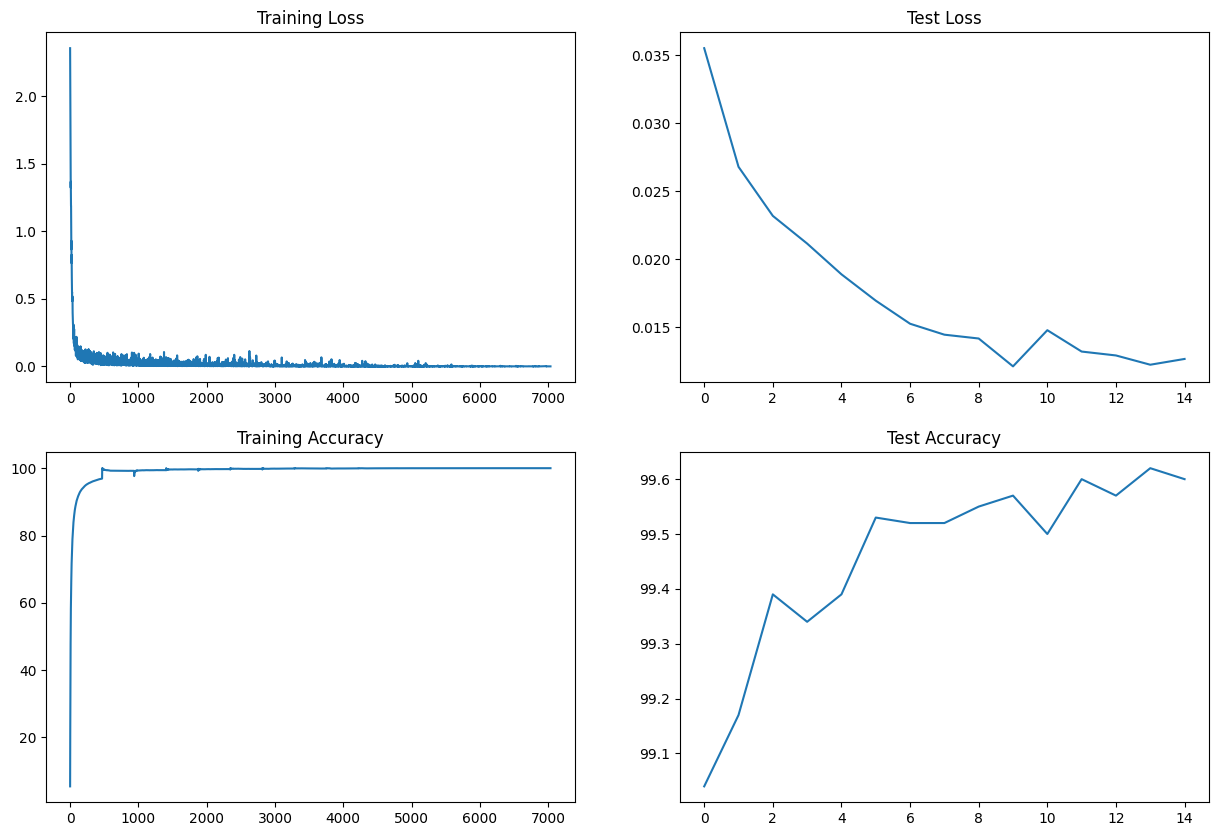

In [12]:
%matplotlib inline
from result_visualisation import Result_Visualisation
result_visualisation_obj = Result_Visualisation()
result_visualisation_obj.plot_accuracy_and_loss(train_losses, test_losses, train_acc, test_acc)